In [4]:
import pandas as pd
import numpy as np
import geopandas
import shapely
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv("/media/gegen07/Expansion/data/mestrado/next-cell-prediction/pontos_usuarios_sudeste_9000.csv")

In [8]:
df

,EXTERNAL_IDENTIFIER,START_DATE,LATITUDE,LONGITUDE,objectID,geometry,index_right,CD_UF,NM_UF,SIGLA,NM_REGIAO
0,en8PNzN/vXrjPPnO2GzqAj2CMW1EfrRu5Pd4qUe6bR0mIW...,2021-07-02 11:22:36,-22.64192,-43.25163,50001,POINT (-43.25163 -22.64192),18,33,Rio de Janeiro,RJ,Sudeste
1,en8PNzN/vXrjPPnO2GzqAj2CMW1EfrRu5Pd4qUe6bR0mIW...,2021-07-13 19:19:41,-22.86450,-43.34150,50001,POINT (-43.3415 -22.8645),18,33,Rio de Janeiro,RJ,Sudeste
2,en8PNzN/vXrjPPnO2GzqAj2CMW1EfrRu5Pd4qUe6bR0mIW...,2021-07-03 13:12:51,-22.66965,-43.27269,50001,POINT (-43.27269 -22.66965),18,33,Rio de Janeiro,RJ,Sudeste
3,en8PNzN/vXrjPPnO2GzqAj2CMW1EfrRu5Pd4qUe6bR0mIW...,2021-07-13 19:23:43,-22.86450,-43.34150,50001,POINT (-43.3415 -22.8645),18,33,Rio de Janeiro,RJ,Sudeste
4,en8PNzN/vXrjPPnO2GzqAj2CMW1EfrRu5Pd4qUe6bR0mIW...,2021-07-03 13:12:51,-22.66965,-43.27269,50001,POINT (-43.27269 -22.66965),18,33,Rio de Janeiro,RJ,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...
36222,etD9tmABp5kXhwJ1GKiNd9nxUf+M5Zwn4Im5A3ADPS7gL4...,2021-07-15 01:58:07,-20.14201,-40.25396,50123,POINT (-40.25396 -20.14201),17,32,Espírito Santo,ES,Sudeste
36223,etD9tmABp5kXhwJ1GKiNd9nxUf+M5Zwn4Im5A3ADPS7gL4...,2021-07-15 02:38:48,-20.13814,-40.25391,50123,POINT (-40.25391 -20.13814),17,32,Espírito Santo,ES,Sudeste
36224,etD9tmABp5kXhwJ1GKiNd9nxUf+M5Zwn4Im5A3ADPS7gL4...,2021-07-18 23:29:01,-20.13586,-40.25506,50123,POINT (-40.25506 -20.13586),17,32,Espírito Santo,ES,Sudeste
36225,etD9tmABp5kXhwJ1GKiNd9nxUf+M5Zwn4Im5A3ADPS7gL4...,2021-07-19 00:12:06,-20.13584,-40.25507,50123,POINT (-40.25507 -20.13584),17,32,Espírito Santo,ES,Sudeste


In [9]:
df["datetime"] = pd.to_datetime(df["START_DATE"], format="%Y-%m-%d %H:%M:%S")

In [12]:
df["hour"] = df["datetime"].dt.hour
df["minute"] = df["datetime"].dt.minute
df["weekday"] = df["datetime"].dt.weekday
df["timeslot"] = df.apply(lambda x: max(x["hour"]*2-1, 0) if x["minute"] < 30 else x["hour"]+1, axis=1)
df["day"] = df["datetime"].dt.day_of_year
df["year"] = df["datetime"].dt.year

In [16]:
df = df[df["year"] == 2021]

In [17]:
df = df.sort_values(by=["objectID", "datetime"], ascending=True)
df

,EXTERNAL_IDENTIFIER,START_DATE,LATITUDE,LONGITUDE,objectID,geometry,index_right,CD_UF,NM_UF,SIGLA,NM_REGIAO,datetime,hour,minute,weekday,timeslot,day,year
1342,en8PNzN/vXrjPPnO2GzqAj2CMW1EfrRu5Pd4qUe6bR0mIW...,2021-05-01 00:42:46,-22.70375,-43.29017,50001,POINT (-43.29017 -22.70375),18,33,Rio de Janeiro,RJ,Sudeste,2021-05-01 00:42:46,0,42,5,1,121,2021
1343,en8PNzN/vXrjPPnO2GzqAj2CMW1EfrRu5Pd4qUe6bR0mIW...,2021-05-01 00:57:50,-22.64407,-43.28433,50001,POINT (-43.28433 -22.64407),18,33,Rio de Janeiro,RJ,Sudeste,2021-05-01 00:57:50,0,57,5,1,121,2021
1344,en8PNzN/vXrjPPnO2GzqAj2CMW1EfrRu5Pd4qUe6bR0mIW...,2021-05-01 01:02:20,-22.63860,-43.27191,50001,POINT (-43.27191 -22.6386),18,33,Rio de Janeiro,RJ,Sudeste,2021-05-01 01:02:20,1,2,5,1,121,2021
1345,en8PNzN/vXrjPPnO2GzqAj2CMW1EfrRu5Pd4qUe6bR0mIW...,2021-05-01 01:37:43,-22.64642,-43.24834,50001,POINT (-43.24834 -22.64642),18,33,Rio de Janeiro,RJ,Sudeste,2021-05-01 01:37:43,1,37,5,2,121,2021
1346,en8PNzN/vXrjPPnO2GzqAj2CMW1EfrRu5Pd4qUe6bR0mIW...,2021-05-01 03:24:05,-22.64656,-43.24837,50001,POINT (-43.24837 -22.64656),18,33,Rio de Janeiro,RJ,Sudeste,2021-05-01 03:24:05,3,24,5,5,121,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28774,etQgj1LvrVHRnN0Usm/rrvhQUKa6Qn3tue1vFILHNyoyg4...,2021-07-27 13:12:07,-23.53089,-46.20535,50130,POINT (-46.20535 -23.53089),19,35,São Paulo,SP,Sudeste,2021-07-27 13:12:07,13,12,1,25,208,2021
28776,etQgj1LvrVHRnN0Usm/rrvhQUKa6Qn3tue1vFILHNyoyg4...,2021-07-27 13:12:07,-23.53089,-46.20535,50130,POINT (-46.20535 -23.53089),19,35,São Paulo,SP,Sudeste,2021-07-27 13:12:07,13,12,1,25,208,2021
28778,etQgj1LvrVHRnN0Usm/rrvhQUKa6Qn3tue1vFILHNyoyg4...,2021-07-27 13:12:07,-23.53089,-46.20535,50130,POINT (-46.20535 -23.53089),19,35,São Paulo,SP,Sudeste,2021-07-27 13:12:07,13,12,1,25,208,2021
28780,etQgj1LvrVHRnN0Usm/rrvhQUKa6Qn3tue1vFILHNyoyg4...,2021-07-27 13:12:07,-23.53089,-46.20535,50130,POINT (-46.20535 -23.53089),19,35,São Paulo,SP,Sudeste,2021-07-27 13:12:07,13,12,1,25,208,2021


In [18]:
df = df.drop_duplicates(subset=["objectID", "timeslot", "day"], keep="last").reset_index(drop=True)

In [19]:
df["rank"] = df.groupby("objectID")["day"].rank(method="dense", ascending=True)

In [20]:
df["objectID"].unique()

array([50001, 50002, 50003, 50004, 50007, 50010, 50011, 50012, 50014,
       50016, 50017, 50023, 50024, 50025, 50026, 50027, 50028, 50031,
       50032, 50033, 50035, 50036, 50037, 50038, 50040, 50047, 50048,
       50050, 50053, 50056, 50059, 50061, 50062, 50063, 50064, 50067,
       50068, 50075, 50082, 50084, 50086, 50088, 50090, 50091, 50092,
       50093, 50095, 50096, 50098, 50103, 50104, 50108, 50110, 50118,
       50120, 50123, 50129, 50130])

In [21]:
df[df["objectID"]==50062]

,EXTERNAL_IDENTIFIER,START_DATE,LATITUDE,LONGITUDE,objectID,geometry,index_right,CD_UF,NM_UF,SIGLA,NM_REGIAO,datetime,hour,minute,weekday,timeslot,day,year,rank
1566,eq/CghUy79dpP0K2Cu5WF3403ha1RuIvvsS6ivvd8EoPJr...,2021-01-02 01:41:30,-20.66584,-40.51323,50062,POINT (-40.51323 -20.66584),17,32,Espírito Santo,ES,Sudeste,2021-01-02 01:41:30,1,41,5,2,2,2021,1.0
1567,eq/CghUy79dpP0K2Cu5WF3403ha1RuIvvsS6ivvd8EoPJr...,2021-01-02 15:02:45,-20.66582,-40.51307,50062,POINT (-40.51307 -20.66582),17,32,Espírito Santo,ES,Sudeste,2021-01-02 15:02:45,15,2,5,29,2,2021,1.0
1568,eq/CghUy79dpP0K2Cu5WF3403ha1RuIvvsS6ivvd8EoPJr...,2021-01-05 14:37:03,-20.66582,-40.51310,50062,POINT (-40.5131 -20.66582),17,32,Espírito Santo,ES,Sudeste,2021-01-05 14:37:03,14,37,1,15,5,2021,2.0
1569,eq/CghUy79dpP0K2Cu5WF3403ha1RuIvvsS6ivvd8EoPJr...,2021-01-05 23:16:19,-20.64545,-40.51161,50062,POINT (-40.51161 -20.64545),17,32,Espírito Santo,ES,Sudeste,2021-01-05 23:16:19,23,16,1,45,5,2021,2.0
1570,eq/CghUy79dpP0K2Cu5WF3403ha1RuIvvsS6ivvd8EoPJr...,2021-01-06 14:29:34,-20.66581,-40.51307,50062,POINT (-40.51307 -20.66581),17,32,Espírito Santo,ES,Sudeste,2021-01-06 14:29:34,14,29,2,27,6,2021,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,eq/CghUy79dpP0K2Cu5WF3403ha1RuIvvsS6ivvd8EoPJr...,2021-07-23 16:49:12,-20.66589,-40.51303,50062,POINT (-40.51303 -20.66589),17,32,Espírito Santo,ES,Sudeste,2021-07-23 16:49:12,16,49,4,17,204,2021,131.0
1804,eq/CghUy79dpP0K2Cu5WF3403ha1RuIvvsS6ivvd8EoPJr...,2021-07-25 20:56:38,-20.66578,-40.51311,50062,POINT (-40.51311 -20.66578),17,32,Espírito Santo,ES,Sudeste,2021-07-25 20:56:38,20,56,6,21,206,2021,132.0
1805,eq/CghUy79dpP0K2Cu5WF3403ha1RuIvvsS6ivvd8EoPJr...,2021-07-29 11:59:04,-20.66578,-40.51306,50062,POINT (-40.51306 -20.66578),17,32,Espírito Santo,ES,Sudeste,2021-07-29 11:59:04,11,59,3,12,210,2021,133.0
1806,eq/CghUy79dpP0K2Cu5WF3403ha1RuIvvsS6ivvd8EoPJr...,2021-07-29 16:27:44,-20.66576,-40.51306,50062,POINT (-40.51306 -20.66576),17,32,Espírito Santo,ES,Sudeste,2021-07-29 16:27:44,16,27,3,31,210,2021,133.0


<Axes: ylabel='Frequency'>

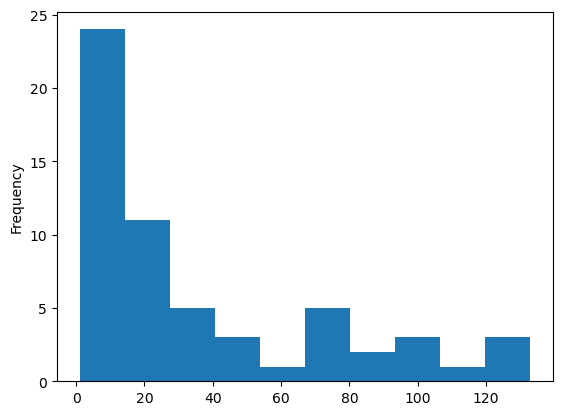

In [22]:
df.groupby("objectID")["rank"].max().plot(kind="hist", bins=10)

In [23]:
df["objectID"].nunique()

58

In [24]:
train = df[df["objectID"].isin((df.groupby("objectID")["rank"].max().sort_values(ascending=False).reset_index().query("rank >= 25").objectID.tolist()))]

In [25]:
gdf = geopandas.GeoDataFrame(train, geometry=geopandas.points_from_xy(x=train.LONGITUDE, y=train.LATITUDE))

<Axes: >

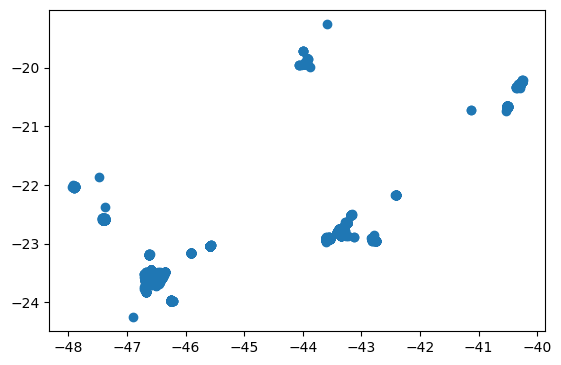

In [26]:
gdf.plot()

In [27]:
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=200
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for n1, x0 in enumerate(np.arange(xmin, xmax+cell_size, cell_size)):
    for n2, y0 in enumerate(np.arange(ymin, ymax+cell_size, cell_size)):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append([shapely.geometry.box(x0, y0, x1, y1), n1, n2])
cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry', 'x', 'y'])

In [28]:
cell

,geometry,x,y
0,"POLYGON ((-47.98253 -24.24703, -47.98253 -24.2...",0,0
1,"POLYGON ((-47.98253 -24.20857, -47.98253 -24.1...",0,1
2,"POLYGON ((-47.98253 -24.17010, -47.98253 -24.1...",0,2
3,"POLYGON ((-47.98253 -24.13164, -47.98253 -24.0...",0,3
4,"POLYGON ((-47.98253 -24.09317, -47.98253 -24.0...",0,4
...,...,...,...
26457,"POLYGON ((-40.25124 -19.40055, -40.25124 -19.3...",201,126
26458,"POLYGON ((-40.25124 -19.36208, -40.25124 -19.3...",201,127
26459,"POLYGON ((-40.25124 -19.32362, -40.25124 -19.2...",201,128
26460,"POLYGON ((-40.25124 -19.28515, -40.25124 -19.2...",201,129


In [29]:
cell["id"] = range(len(cell))

(-48.328711500000004, -39.8665985, -24.496298499999998, -19.0123915)

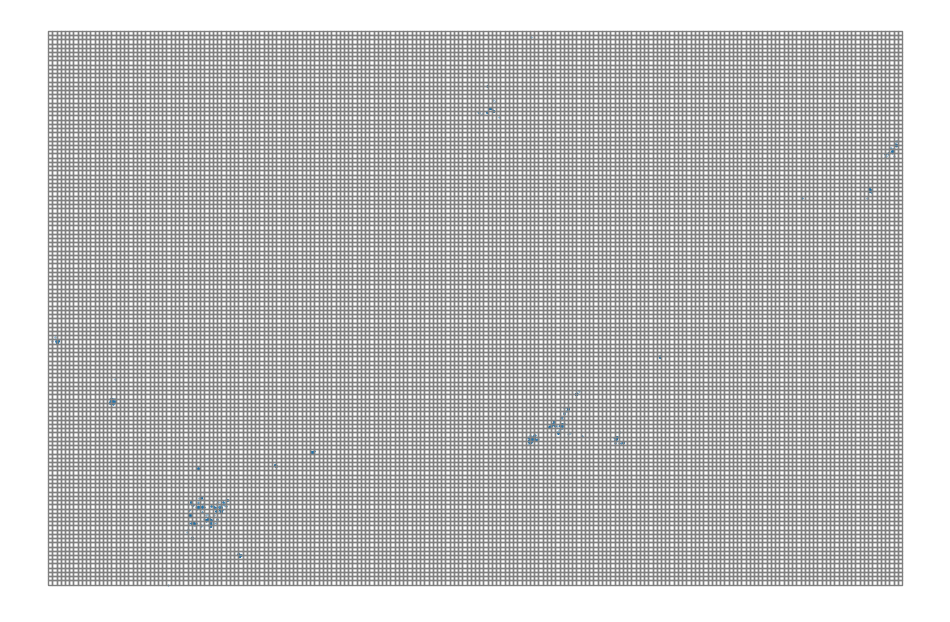

In [118]:
ax = gdf.plot(markersize=.1, figsize=(12, 8))
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [30]:
cell

,geometry,x,y,id
0,"POLYGON ((-47.98253 -24.24703, -47.98253 -24.2...",0,0,0
1,"POLYGON ((-47.98253 -24.20857, -47.98253 -24.1...",0,1,1
2,"POLYGON ((-47.98253 -24.17010, -47.98253 -24.1...",0,2,2
3,"POLYGON ((-47.98253 -24.13164, -47.98253 -24.0...",0,3,3
4,"POLYGON ((-47.98253 -24.09317, -47.98253 -24.0...",0,4,4
...,...,...,...,...
26457,"POLYGON ((-40.25124 -19.40055, -40.25124 -19.3...",201,126,26457
26458,"POLYGON ((-40.25124 -19.36208, -40.25124 -19.3...",201,127,26458
26459,"POLYGON ((-40.25124 -19.32362, -40.25124 -19.2...",201,128,26459
26460,"POLYGON ((-40.25124 -19.28515, -40.25124 -19.2...",201,129,26460


In [31]:
merged = geopandas.sjoin(gdf.drop(["index_right"], axis=1), cell, how='left', op='within')

/home/gegen07/micromamba/envs/masters/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [34]:
merged[["objectID", "timeslot", "rank", "x", "y"]].to_csv("train.csv", index=False)

In [36]:
merged[["objectID", "timeslot", "rank", "x", "y"]]

,objectID,timeslot,rank,x,y
0,50001,1,1.0,122.0,41.0
1,50001,2,1.0,123.0,41.0
2,50001,5,1.0,123.0,41.0
3,50001,12,1.0,123.0,41.0
4,50001,15,1.0,122.0,41.0
...,...,...,...,...,...
3463,50129,31,30.0,40.0,19.0
3464,50129,4,31.0,42.0,19.0
3465,50129,7,32.0,42.0,19.0
3466,50129,11,33.0,42.0,18.0
